In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA, FastICA

from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, mean_squared_error, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from time import perf_counter

In [2]:
breast_cancer = pd.read_csv('Wisconsin Breast Cancer/breast cancer.csv')  # Classification
breast_cancer = breast_cancer.drop(['Unnamed: 32'], axis=1)
breast_cancer['diagnosis'] = (breast_cancer['diagnosis'] == 'M')

boston_housing = pd.read_csv('Boston Housing/Boston-house-price-data.csv')      # Regression

uci_iris = pd.read_csv('UCI Iris/iris.data', header=None)                       # Clustering
uci_iris.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
uci_iris['class'] = ((uci_iris['class'] == 'Iris-setosa').astype(int)
                    + 2 * (uci_iris['class'] == 'Iris-versicolor').astype(int)
                    + 3 * (uci_iris['class'] == 'Iris-virginica').astype(int))

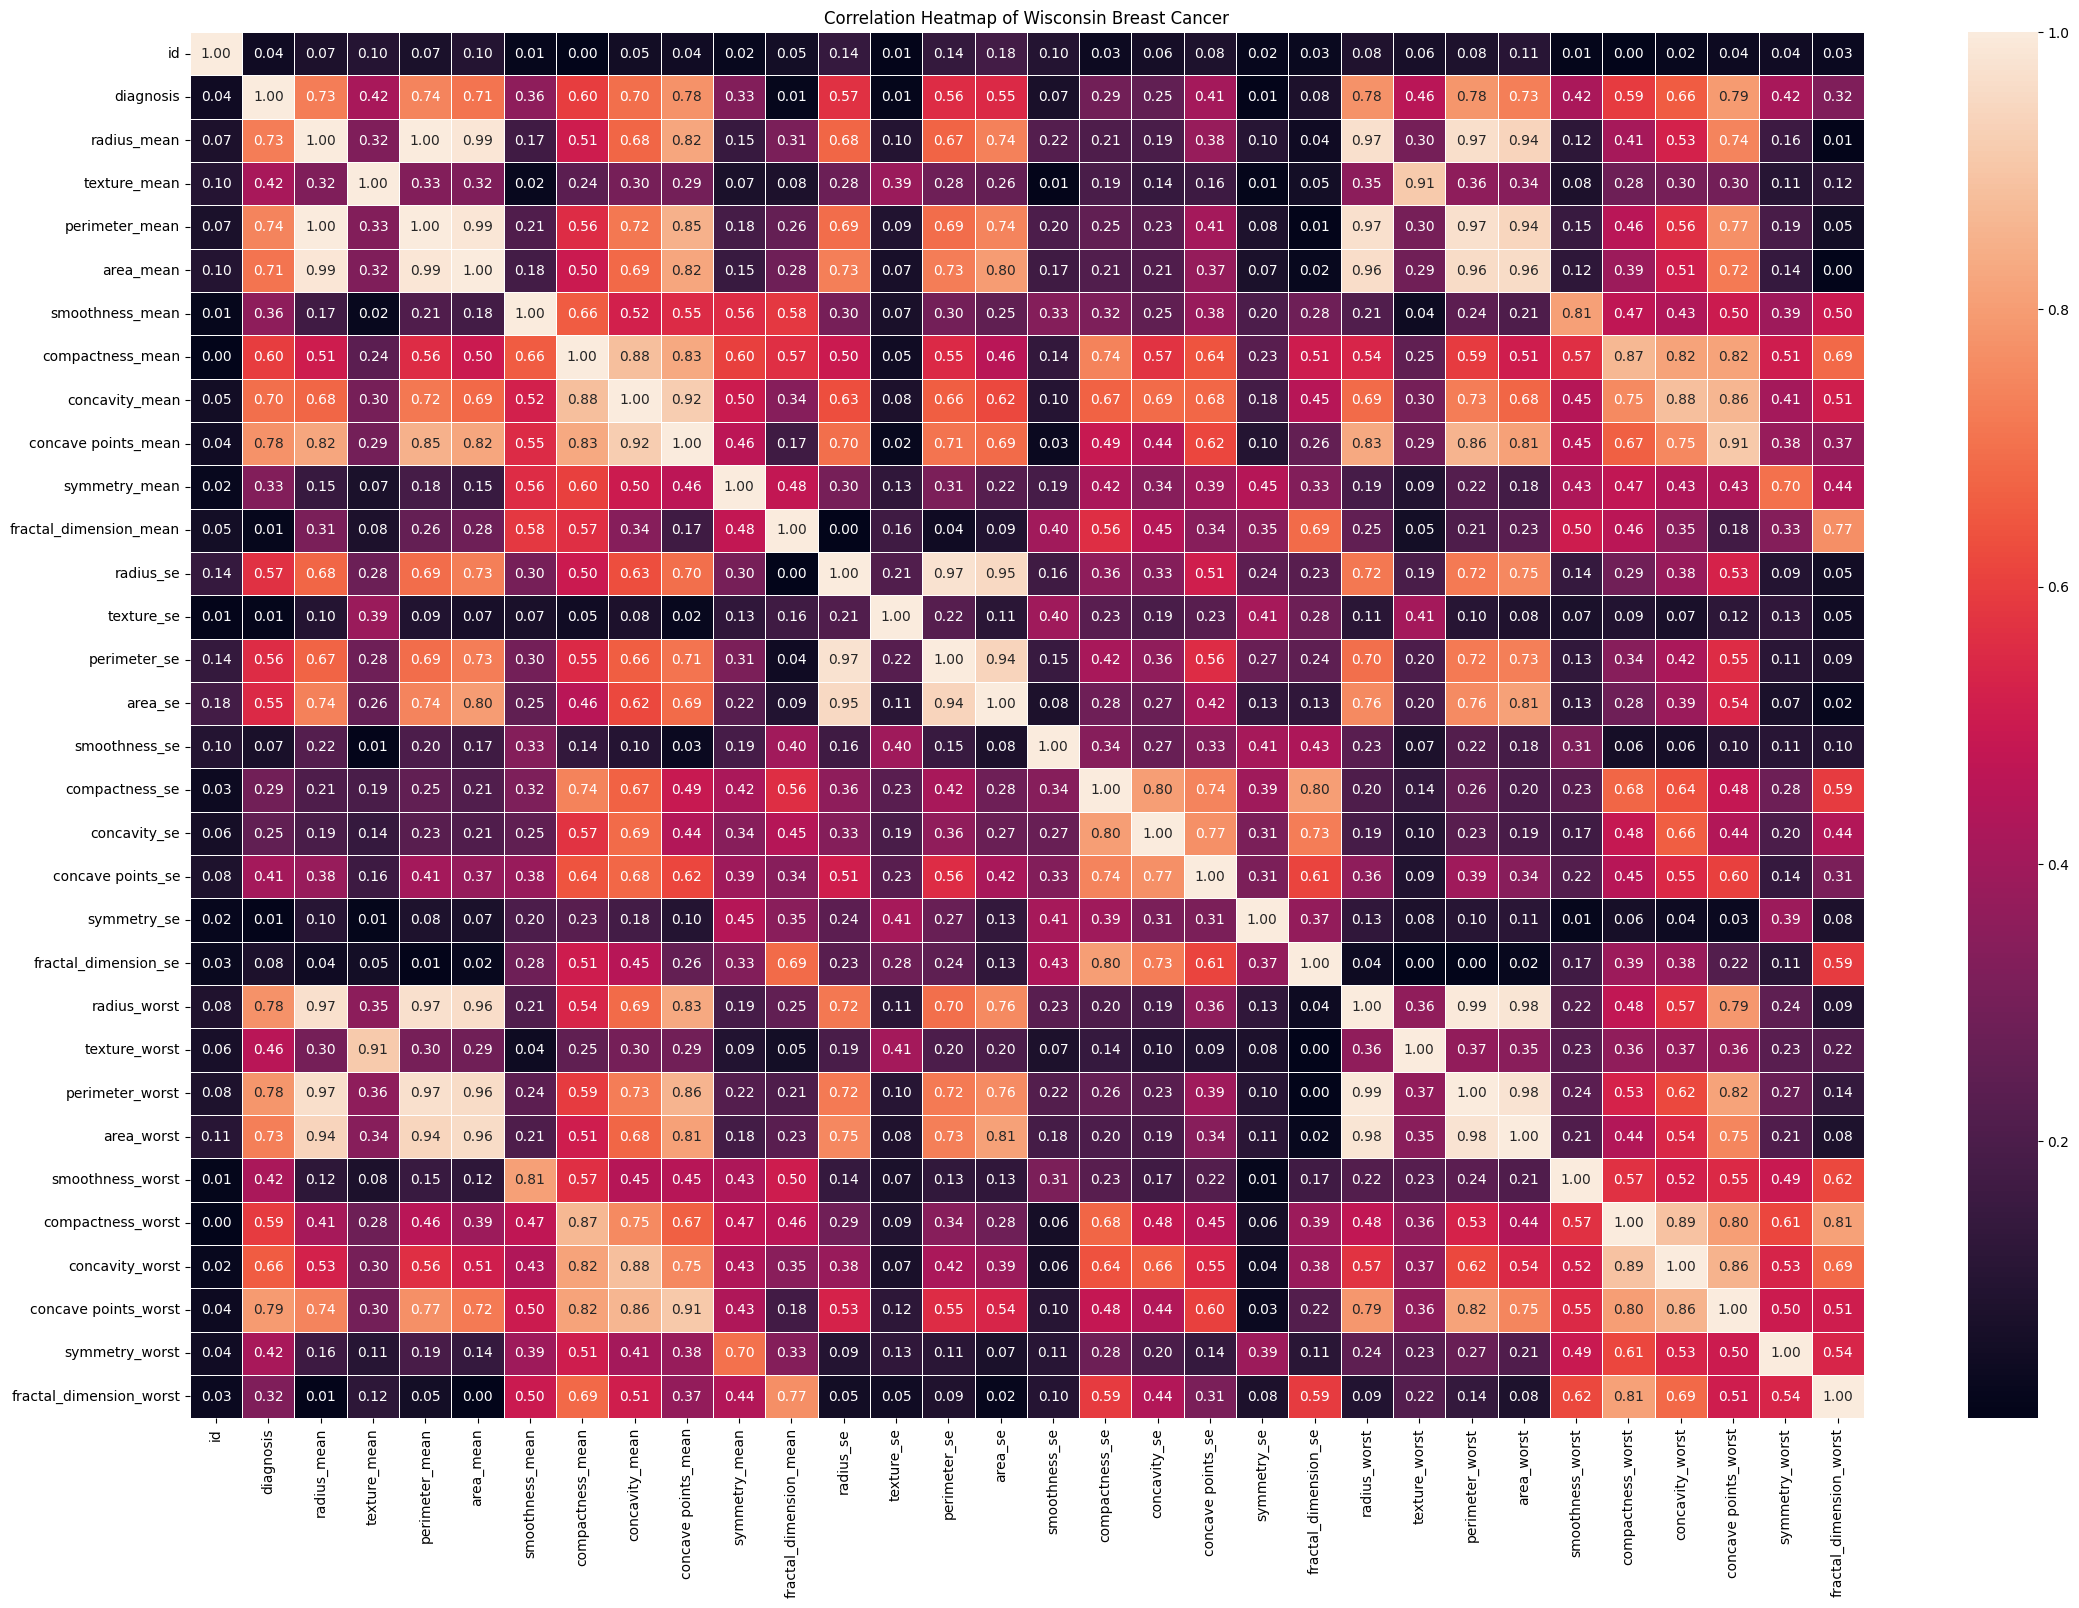

In [3]:
fig, ax = plt.subplots(figsize=(27, 18))
sns.heatmap(breast_cancer.corr().abs(), annot=True, fmt='.2f', linewidths=.5, ax=ax)
ax.set_title("Correlation Heatmap of Wisconsin Breast Cancer")
# plt.tight_layout()
plt.show()

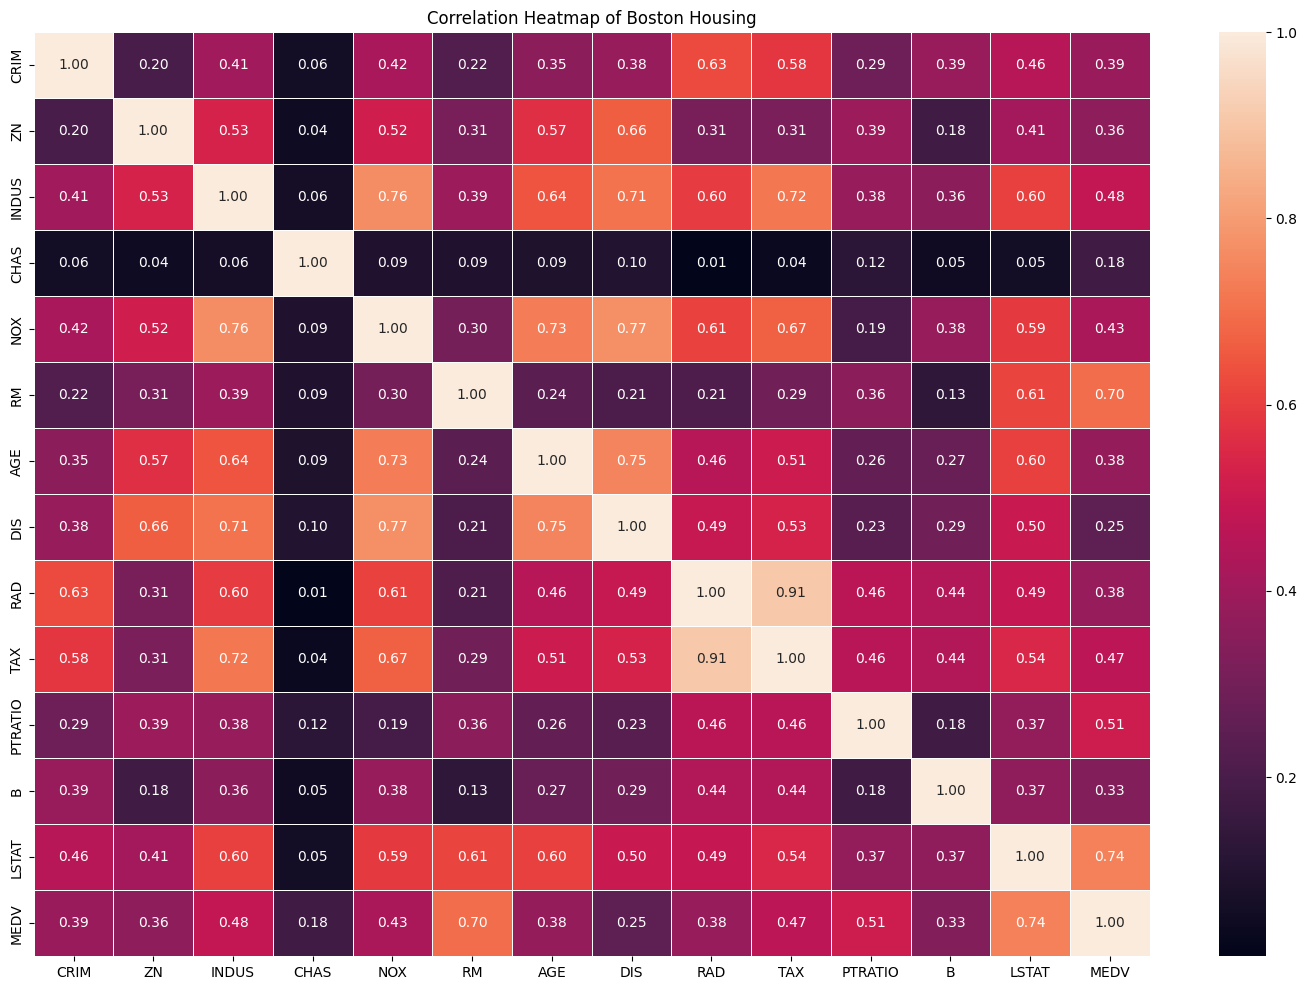

In [4]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(boston_housing.corr().abs(), annot=True, fmt='.2f', linewidths=.5, ax=ax)
ax.set_title("Correlation Heatmap of Boston Housing")
plt.show()

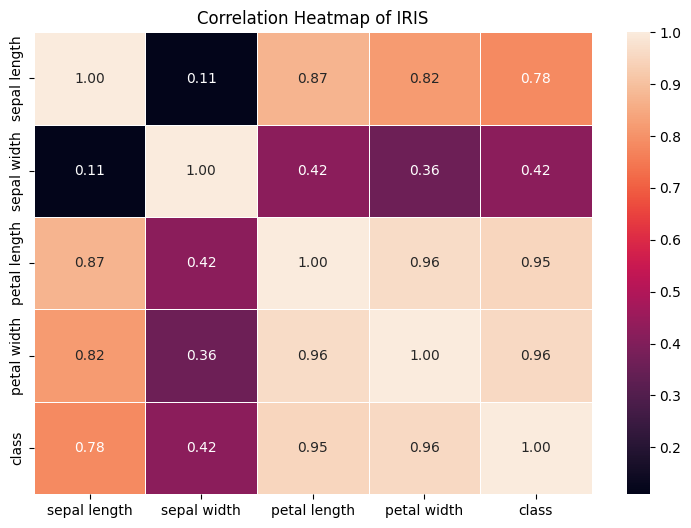

In [5]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(uci_iris.corr().abs(), annot=True, fmt='.2f', linewidths=.5, ax=ax)
ax.set_title("Correlation Heatmap of IRIS")
plt.show()

In [6]:
bc_features = breast_cancer.drop('diagnosis', axis=1)
bc_target = breast_cancer['diagnosis']

bh_features = boston_housing.drop('MEDV', axis=1)
bh_target = boston_housing['MEDV']

ir_features = uci_iris.drop('class', axis=1)
ir_target = uci_iris['class']

In [7]:
bc_features_train, bc_features_test, bc_target_train, bc_target_test = train_test_split(bc_features, bc_target, test_size=0.2, random_state=42)
bh_features_train, bh_features_test, bh_target_train, bh_target_test = train_test_split(bh_features, bh_target, test_size=0.2, random_state=42)
ir_features_train, ir_features_test, ir_target_train, ir_target_test = train_test_split(ir_features, ir_target, test_size=0.2, random_state=42)

In [8]:
bc_train_versions = {'bc' : bc_features_train}
bh_train_versions = {'bh' : bh_features_train}
ir_train_versions = {'ir' : ir_features_train}

bc_test_versions = {'bc' : bc_features_test}
bh_test_versions = {'bh' : bh_features_test}
ir_test_versions = {'ir' : ir_features_test}

In [9]:
scaler_bc = StandardScaler()
bc_train_versions['bc_scale'] = scaler_bc.fit_transform(bc_features_train)
bc_test_versions['bc_scale'] = scaler_bc.transform(bc_features_test)

scaler_bh = StandardScaler()
bh_train_versions['bh_scale'] = scaler_bh.fit_transform(bh_features_train)
bh_test_versions['bh_scale'] = scaler_bh.transform(bh_features_test)

scaler_ir = StandardScaler()
ir_train_versions['ir_scale'] = scaler_ir.fit_transform(ir_features_train)
ir_test_versions['ir_scale'] = scaler_ir.transform(ir_features_test)

### PCA

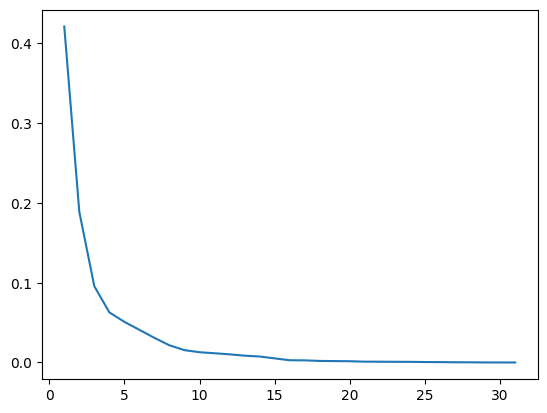

In [10]:
pca_bc = PCA()
bc_pca_features_train = pca_bc.fit_transform(bc_train_versions['bc_scale'])

fig, ax = plt.subplots()
ax.plot(range(1, len(bc_features.columns)+1), pca_bc.explained_variance_ratio_)
ax.set_title('')
plt.show()

In [11]:
bc_train_versions['bc_pca'] = bc_pca_features_train[:, :8]
bc_test_versions['bc_pca'] = pca_bc.transform(bc_test_versions['bc_scale'])[:, :8]

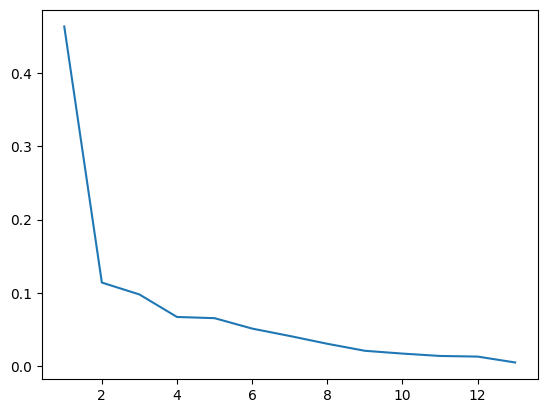

In [12]:
pca_bh = PCA()
bh_pca_features_train = pca_bh.fit_transform(bh_train_versions['bh_scale'])

fig, ax = plt.subplots()
ax.plot(range(1, len(bh_features.columns)+1), pca_bh.explained_variance_ratio_)
# ax.set_title('')
plt.show()

In [13]:
bh_train_versions['bh_pca'] = bh_pca_features_train[:, :4]
bh_test_versions['bh_pca'] = pca_bh.transform(bh_test_versions['bh_scale'])[:, :7]

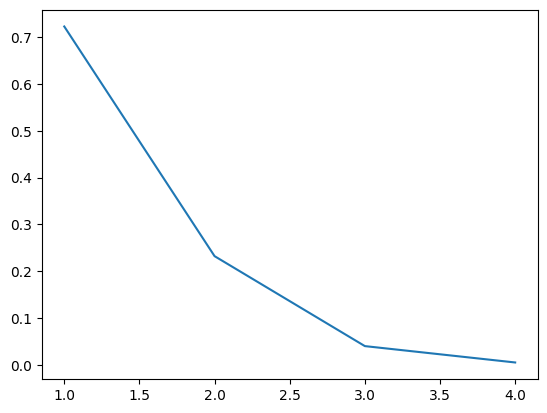

In [14]:
pca_ir = PCA()
ir_pca_features_train = pca_ir.fit_transform(ir_train_versions['ir_scale'])

fig, ax = plt.subplots()
ax.plot(range(1, len(ir_features.columns)+1), pca_ir.explained_variance_ratio_)
# ax.set_title()
plt.show()

In [15]:
ir_train_versions['ir_pca'] = ir_pca_features_train[:, :2]
ir_test_versions['ir_pca'] = pca_ir.transform(ir_test_versions['ir_scale'])[:, :2]

### ICA

/home/iman/CS_Python/.venv/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


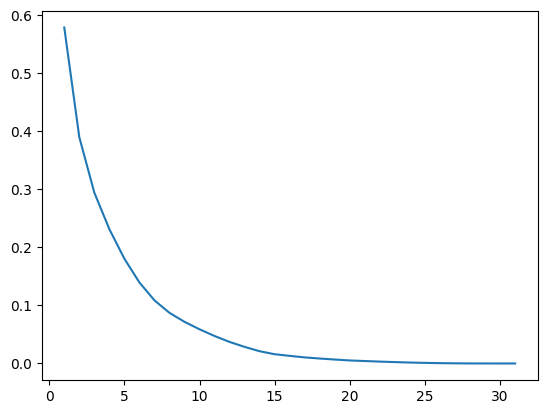

In [16]:
reconstruction_error_history = []
index = []
for i in range(1, len(bc_features.columns)+1):
    ica_bc = FastICA(n_components=i)
    bc_ica_features_train = ica_bc.fit_transform(bc_train_versions['bc_scale'])
    reconstruction_error = ((bc_train_versions['bc_scale'] - ica_bc.inverse_transform(bc_ica_features_train))**2).mean()
    reconstruction_error_history.append(reconstruction_error)
    index.append(i)
fig, ax = plt.subplots()
ax.plot(index, reconstruction_error_history)
# ax.set_title()
plt.show()

In [17]:
ica_bc = FastICA(n_components=8)
bc_train_versions['bc_ica'] = ica_bc.fit_transform(bc_train_versions['bc_scale'])
bc_test_versions['bc_ica'] = ica_bc.transform(bc_test_versions['bc_scale'])

/home/iman/CS_Python/.venv/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/iman/CS_Python/.venv/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/iman/CS_Python/.venv/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/iman/CS_Python/.venv/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


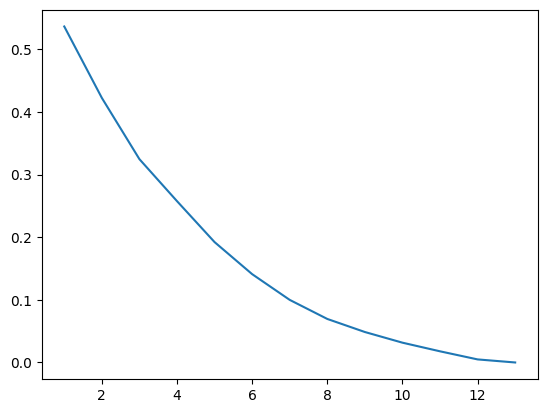

In [18]:
reconstruction_error_history = []
index = []
for i in range(1, len(bh_features.columns)+1):
    ica_bh = FastICA(n_components=i)
    bh_ica_features_train = ica_bh.fit_transform(bh_train_versions['bh_scale'])
    reconstruction_error = ((bh_train_versions['bh_scale'] - ica_bh.inverse_transform(bh_ica_features_train))**2).mean()
    reconstruction_error_history.append(reconstruction_error)
    index.append(i)
fig, ax = plt.subplots()
ax.plot(index, reconstruction_error_history)
# ax.set_title()
plt.show()

In [19]:
ica_bh = FastICA(n_components=4)
bh_train_versions['bh_ica'] = ica_bh.fit_transform(bh_train_versions['bh_scale'])
bh_test_versions['bh_ica'] = ica_bh.transform(bh_test_versions['bh_scale'])

/home/iman/CS_Python/.venv/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


/home/iman/CS_Python/.venv/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


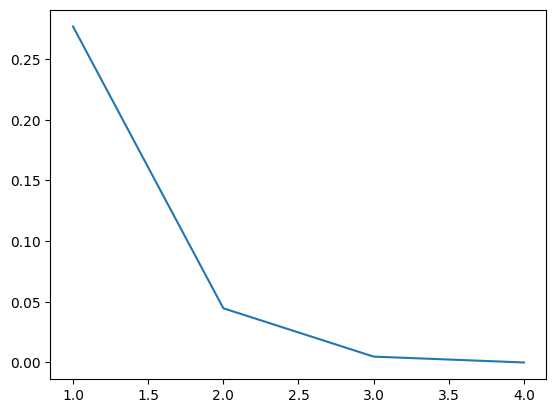

In [20]:
reconstruction_error_history = []
index = []
for i in range(1, len(ir_features.columns)+1):
    ica_ir = FastICA(n_components=i)
    ir_ica_features_train = ica_ir.fit_transform(ir_train_versions['ir_scale'])
    reconstruction_error = ((ir_train_versions['ir_scale'] - ica_ir.inverse_transform(ir_ica_features_train))**2).mean()
    reconstruction_error_history.append(reconstruction_error)
    index.append(i)
fig, ax = plt.subplots()
ax.plot(index, reconstruction_error_history)
# ax.set_title()
plt.show()

In [21]:
ica_ir = FastICA(n_components=2)
ir_train_versions['ir_ica'] = ica_ir.fit_transform(ir_train_versions['ir_scale'])
ir_test_versions['ir_ica'] = ica_ir.transform(ir_test_versions['ir_scale'])

### Select K Best

In [22]:
skb_bc = SelectKBest(f_classif, k=8)
bc_train_versions['bc_skb'] = skb_bc.fit_transform(bc_train_versions['bc_scale'], bc_target_train)
bc_test_versions['bc_skb'] = skb_bc.transform(bc_test_versions['bc_scale'])

skb_bh = SelectKBest(f_regression, k=7)
bh_train_versions['bh_skb'] = skb_bh.fit_transform(bh_train_versions['bh_scale'], bh_target_train)
bh_test_versions['bh_skb'] = skb_bh.transform(bh_test_versions['bh_scale'])

skb_ir = SelectKBest(f_classif, k=2)
ir_train_versions['ir_skb'] = skb_ir.fit_transform(ir_train_versions['ir_scale'], ir_target_train)
ir_test_versions['ir_skb'] = skb_ir.transform(ir_test_versions['ir_scale'])

### Recursive Feature Elimination

In [23]:
est_bc = RandomForestClassifier(random_state=42)
rfe_bc = RFE(est_bc, n_features_to_select=8)
bc_train_versions['bc_rfe'] = rfe_bc.fit_transform(bc_train_versions['bc_scale'], bc_target_train)
bc_test_versions['bc_rfe'] = rfe_bc.transform(bc_test_versions['bc_scale'])

est_bh = LinearRegression()
rfe_bh = RFE(est_bh, n_features_to_select=4)
bh_train_versions['bh_rfe'] = rfe_bh.fit_transform(bh_train_versions['bh_scale'], bh_target_train)
bh_test_versions['bh_rfe'] = rfe_bh.transform(bh_test_versions['bh_scale'])

est_ir = RandomForestClassifier(random_state=42)
rfe_ir = RFE(est_ir, n_features_to_select=2)
ir_train_versions['ir_rfe'] = rfe_ir.fit_transform(ir_train_versions['ir_scale'], ir_target_train)
ir_test_versions['ir_rfe'] = rfe_ir.transform(ir_test_versions['ir_scale'])

# Model Evaluation

## Regression

### LinearRegression

In [24]:
lr_models = {ver : LinearRegression() for ver in bh_train_versions}

lr_times = {}

for ver in bh_train_versions:

    start = perf_counter()

    lr_models[ver].fit(bh_train_versions[ver], bh_target_train)
    
    lr_times[ver] = perf_counter() - start

In [25]:
print("             Mean            Max             Min         Std         learning time       mse")
for ver in lr_models:
    coefs = lr_models[ver].coef_
    mse = mean_squared_error(lr_models[ver].predict(bh_test_versions[ver]), bh_target_test)
    print(f"{ver:<8}    {coefs.mean():+5f}      {coefs.max():+5f}       {coefs.min():<9.5f}     {coefs.std():+5f}     {lr_times[ver]:.5f}       {mse:.5f}")

             Mean            Max             Min         Std         learning time       mse
bh          -0.971998      +4.438835       -17.20263     +4.917647     0.00290       24.29112
bh_scale    -0.421504      +3.145240       -3.61166      +1.960149     0.01072       24.29112


ValueError: X has 7 features, but LinearRegression is expecting 4 features as input.

### SGDRegressor

In [ ]:
sgdr_models = {ver : SGDRegressor() for ver in bh_train_versions}

sgdr_times = {}

for ver in bh_train_versions:
    
    start = perf_counter()

    sgdr_models[ver].fit(bh_train_versions[ver], bh_target_train)

    sgdr_times[ver] = perf_counter() - start

In [ ]:
print(f"{'':>8}{'iterations to converge':<25}{'mse error':<12}{'learning time'}")
for ver in sgdr_models:
    n_iter = sgdr_models[ver].n_iter_
    mse = mean_squared_error(sgdr_models[ver].predict(bh_test_versions[ver]), bh_target_test)
    print(f"{ver:<17}{n_iter:^16}{mse:<12g}{sgdr_times[ver]:.5f}")

## Clustering

### KMeans

In [ ]:
km_models = {ver : KMeans(n_clusters=3) for ver in ir_train_versions}

km_times = {}

for ver in ir_train_versions:

    start = perf_counter()
    
    km_models[ver].fit(ir_train_versions[ver])

    km_times[ver] = perf_counter() - start

In [ ]:
print(f"{" ":<7}{'iterations to converge':^25}{'final inertia':^20}{'silhouette score':^20}{'learning time':^20}")
for ver in km_models:
    n_iter = km_models[ver].n_iter_
    inertia = km_models[ver].inertia_
    sil = silhouette_score(ir_test_versions[ver], km_models[ver].predict(ir_test_versions[ver]))
    print(f"{ver:<17}{n_iter:^16}{inertia:^20.5f}{sil:^20.5f}{km_times[ver]:^20.5f}")

## Classification

### KNeighborsClassifier

In [ ]:
kn_models = {ver : KNeighborsClassifier() for ver in bc_train_versions}

kn_times = {}

for ver in bc_train_versions:

    start = perf_counter()

    kn_models[ver].fit(bc_train_versions[ver], bc_target_train)

    kn_times[ver] = perf_counter() - start

In [ ]:
print(f"{'':<10}{'accuracy':<10}{'prediction time':<18}{'learning time'}")
for ver in kn_models:
    start = perf_counter()
    prediction = kn_models[ver].predict(bc_test_versions[ver])
    predict_time = perf_counter() - start
    acc = accuracy_score(bc_target_test, prediction)
    print(f"{ver:<10}{acc:<10.5f}{predict_time:<18.5f}{kn_times[ver]:<10.5f}")

### RandomForestClassifier

In [ ]:
rfc_models = {ver : RandomForestClassifier(random_state=42) for ver in bc_train_versions}

rfc_times = {}

for ver in bc_train_versions:
    start = perf_counter()

    rfc_models[ver].fit(bc_train_versions[ver], bc_target_train)

    rfc_times[ver] = perf_counter() - start

In [ ]:
print(f"{'':<10}{'accuracy':<10}{'learning time':<18}")
for ver in rfc_models:
    acc = accuracy_score(bc_target_test, rfc_models[ver].predict(bc_test_versions[ver]))
    print(f"{ver:<10}{acc:<10.5f}{rfc_times[ver]:.5f}")